In [2]:
#Importing necessary libraries

from skimage.io import imread
from skimage import img_as_float
from skimage.color import rgb2gray
from skimage.util import random_noise
import numpy as np
from numpy import pad
from scipy import signal
import matplotlib.pyplot as plt

In [4]:
#Helper functions

def plot_image(img,figsize=(5,5)):
    plt.figure(figsize=figsize)
    if len(img.shape)==2:
        plt.imshow(img, cmap="gray")
    else:
        plt.imshow(img)
    plt.axis("off")
    plt.show()
    print("Image shape: ", img.shape)

def plot_kernel(kernel, cmap="Reds"):
    plt.imshow(kernel, interpolation='none', cmap="Reds")
    plt.colorbar()
    plt.show()
    print("Kernel shape: ", kernel.shape)

#def gaussian_kernel(width=1, size=10):
#    gaussian1dkernel = signal.gaussian(size, width).reshape(size, 1)
#    kernel = np.outer(gaussian1dkernel, gaussian1dkernel)
#    return kernel/np.sum(kernel)


def gaussian_kernel(width=1, size=10):
    x = np.linspace(-size // 2, size // 2, size)
    gaussian1dkernel = np.exp(-0.5 * (x / width)**2)
    gaussian1dkernel /= np.sum(gaussian1dkernel)
    kernel = np.outer(gaussian1dkernel, gaussian1dkernel)
    return kernel / np.sum(kernel)

def box_kernel(size=5):
    return np.ones((size, size))/size**2

# Task 1

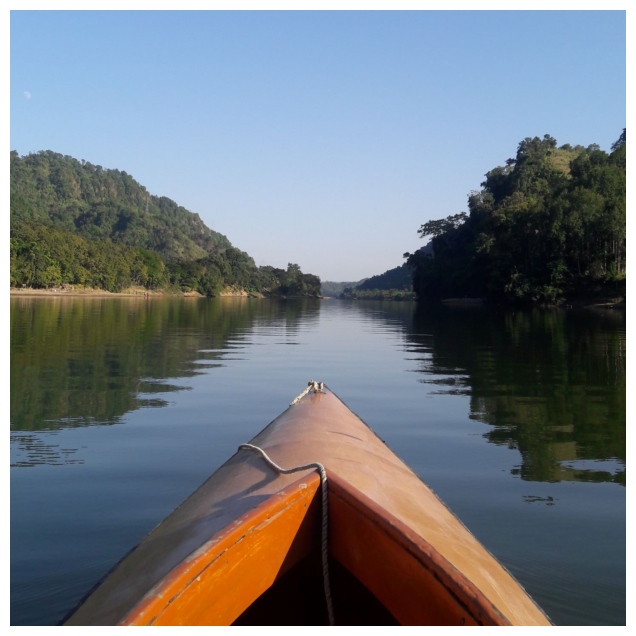

Image shape:  (1448, 1448, 3)


In [7]:
#Read the image kayak.jpg and normalize it

img = img_as_float(imread("kayak.jpg"))
plot_image(img, figsize=(8, 8))

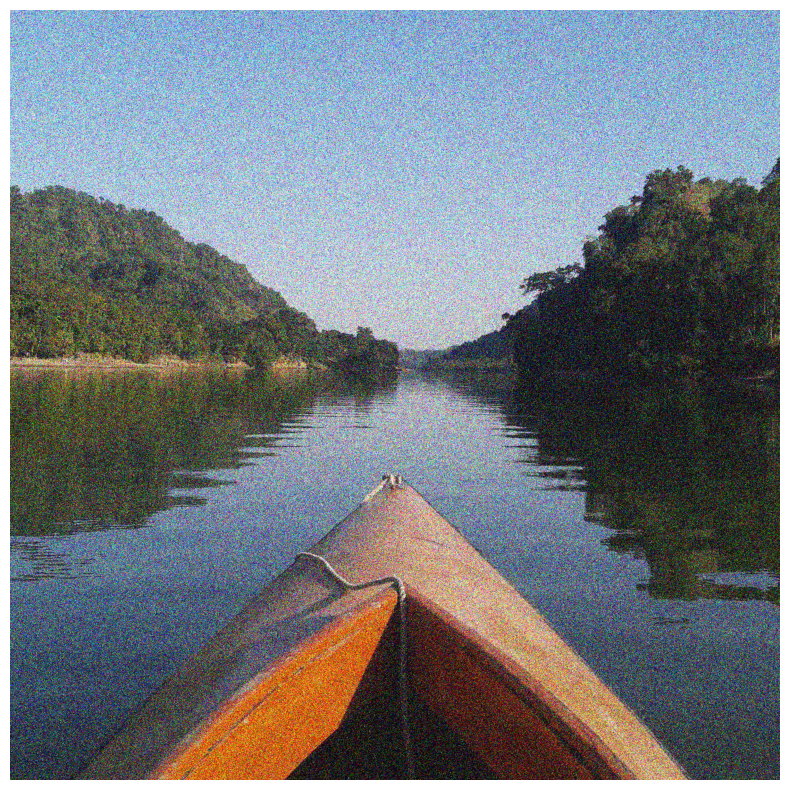

Image shape:  (1448, 1448, 3)


In [8]:
#Add Gaussian Noise into the image with var = 0.07

noisy_image_gaussian = random_noise(img, mode='gaussian', var=0.07) #???
plot_image(noisy_image_gaussian, figsize=(10,10))

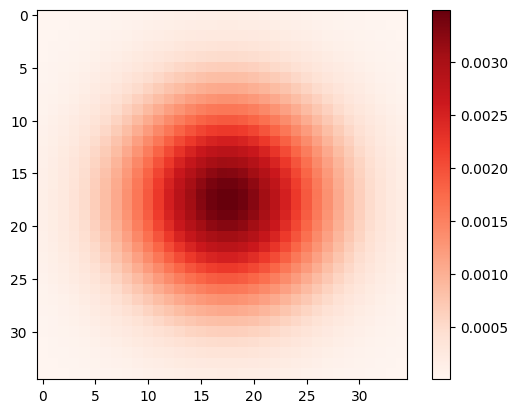

Kernel shape:  (35, 35)


In [31]:
# define kernel
# kernel shape (k, k). k should be 35
k = 35 #???

# spread for gaussian, define as k/5
spread = k/5 #???
kernel = gaussian_kernel(spread, size=k)
plot_kernel(kernel)

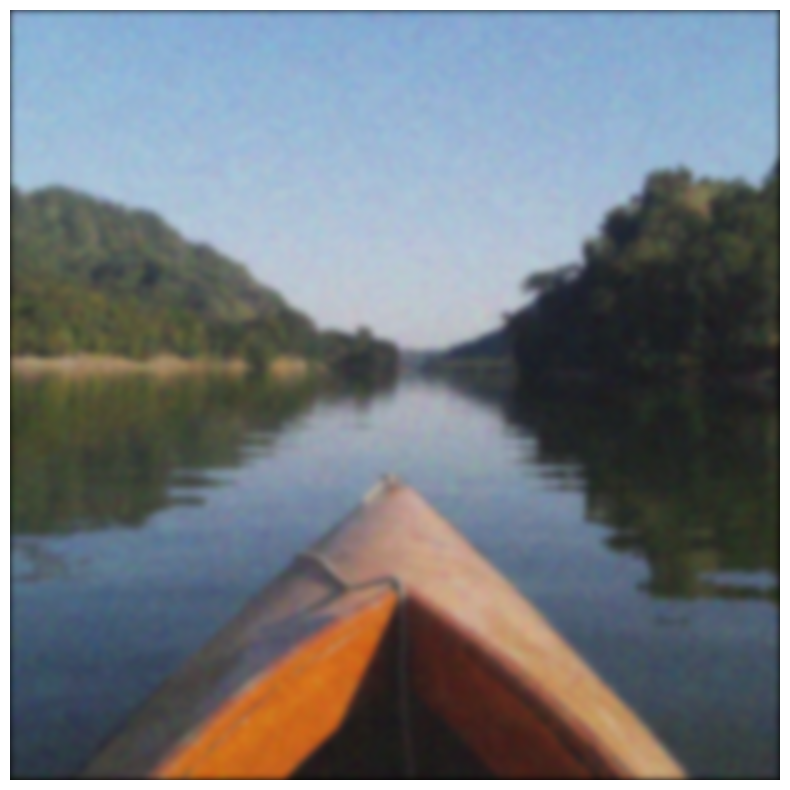

Image shape:  (1448, 1448, 3)


In [32]:
#Denoising

img_filtered = np.zeros_like(img)

for i in range(img.shape[-1]):
  img_filtered[:,:,i] = np.clip(signal.correlate(noisy_image_gaussian[:,:,i], kernel, mode='same', method='auto'), 0, 1)

plot_image(img_filtered, figsize=(10,10))

# Task 2

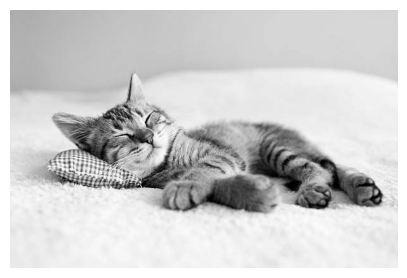

Image shape:  (408, 612)


In [13]:
#Read the RGB image sleeping_cat.jpg and convert it to greyscale

blurry_text = rgb2gray(imread("sleeping_cat.jpg"))
plot_image(blurry_text)


In [15]:
# define kernel
# kernel shape (k, k). k should be odd
k = 95
# spread for gaussian, spread > 1
spread = 30
kernel = gaussian_kernel(spread, size=k)
# kernel = box_kernel(size=k)
# plot_kernel(kernel)

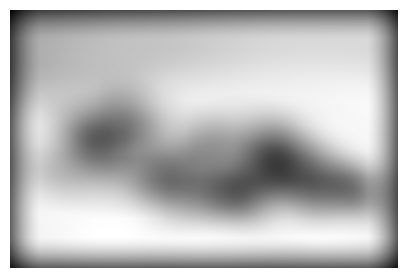

Image shape:  (408, 612)


In [25]:
blurry_text_filtered = signal.correlate(blurry_text, kernel, mode='same', method='auto')

plot_image(blurry_text_filtered)

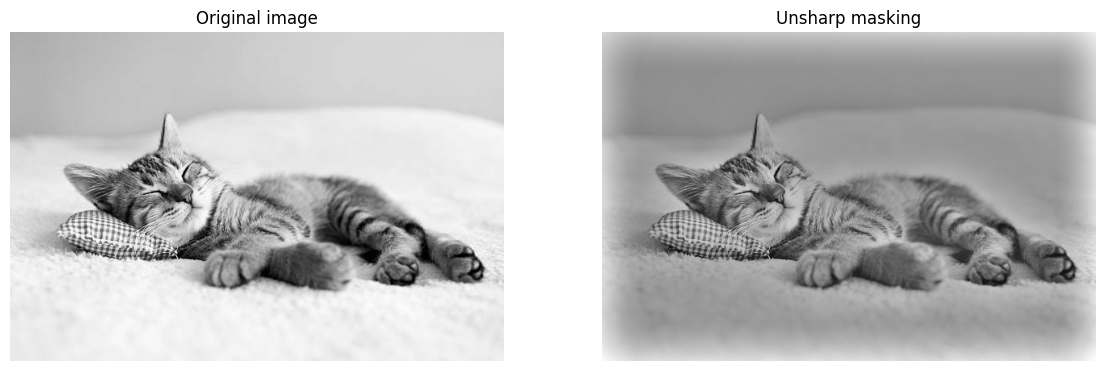

In [26]:
K =3.5 #??? #Define as 3.5

#Multiple plots using pyplot
fig = plt.figure(figsize=(14, 7))

ax1 = fig.add_subplot(1,2,1)
ax1.imshow(blurry_text, cmap="gray")
ax1.title.set_text('Original image')
ax1.axis("off")

ax2 = fig.add_subplot(1,2,2)
ax2.imshow(blurry_text+K*(blurry_text-blurry_text_filtered), cmap="gray")
ax2.title.set_text('Unsharp masking')
ax2.axis("off")

plt.show()